<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, optimizers

In [26]:
def load_quickdraw10(path, test_size=.2, random_state=42):
    data = np.load(path)
    X = data['arr_0']
    y = data['arr_1']
    X, y = shuffle(
               X, y, 
               random_state=random_state
           )
    return train_test_split(
               X, y, 
               test_size=test_size, 
               random_state=random_state
           )

In [27]:
path = '../quickdraw10.npz'
X_train, X_val, y_train, y_val = load_quickdraw10(path)

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [28]:
##### Your Code Here #####

def create_model(learning_rate=.001, optimizer='adam'):
    model = Sequential()
    model.add(layers.Dense(64, activation='relu', input_dim=784))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    opt = optimizers.deserialize(
              {'class_name': optimizer,
               'config': {'learning_rate': learning_rate}}
          )
    model.compile(
        optimizer=opt,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [123]:
# Visualization function

def vis(results, test_params):
    df = pd.DataFrame.from_records(results.history)
    df['epoch'] = [i+1 for i in range(df.shape[0])]

    fig, axs = plt.subplots(figsize=[15,5], ncols=2)

    sns.lineplot(x='epoch', y='loss', data=df, label='train', ax=axs[0])
    sns.lineplot(x='epoch', y='val_loss', data=df, label='val', ax=axs[0])
    axs[0].set_ylabel('loss')

    sns.lineplot(x='epoch', y='accuracy', data=df, label='train', ax=axs[1])
    sns.lineplot(x='epoch', y='val_accuracy', data=df, label='val', ax=axs[1])
    axs[1].set_ylabel('accuracy')

    for ax in axs:
        x_ax = ax.get_xaxis()
        x_ax.set_major_locator(MaxNLocator(integer=True))
        ax.grid(color='#DDDDDD')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.tick_params(color='white')
        
    plt.suptitle(test_params, fontsize=16)
    plt.show()

In [164]:
# Simple function to experiment with batch_size

def batch_exp(batch_size=100, epochs=5):
    model = create_model()
    results = model.fit(
        X_train, y_train,
        epochs=epochs,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        verbose=False
    )
    vis(results, test_params=f'Batch Size: {batch_size} | Epochs: {epochs}')

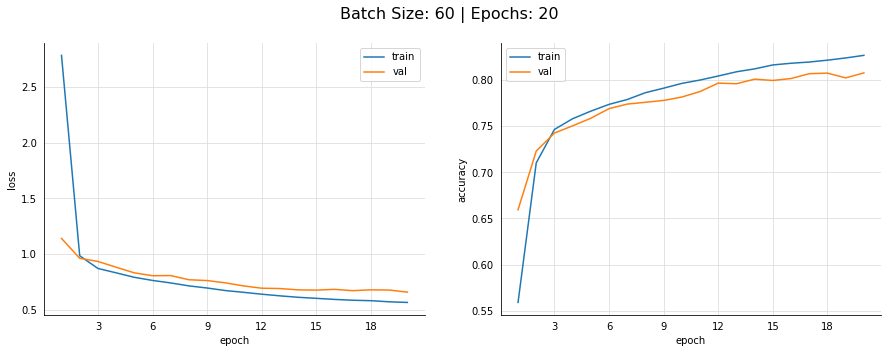

In [130]:
batch_exp(batch_size=60, epochs=20)

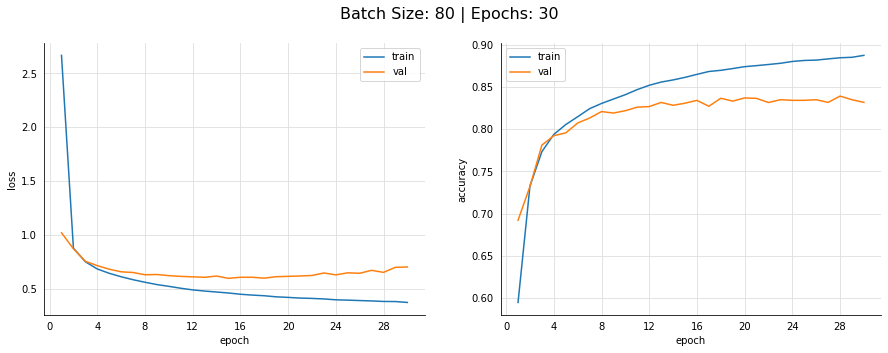

In [152]:
batch_exp(batch_size=80, epochs=30)

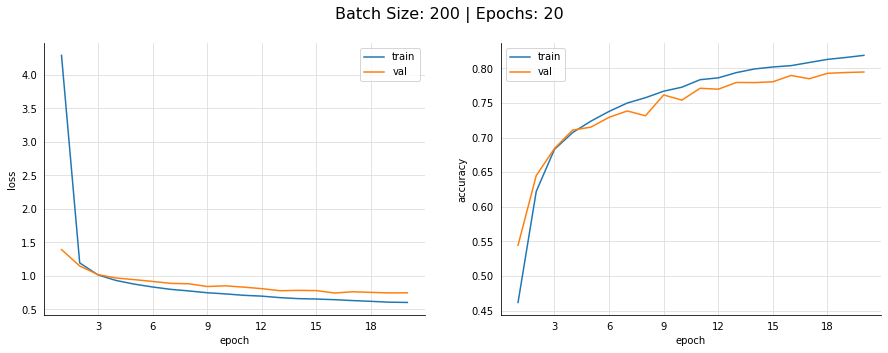

In [132]:
batch_exp(batch_size=200, epochs=20)

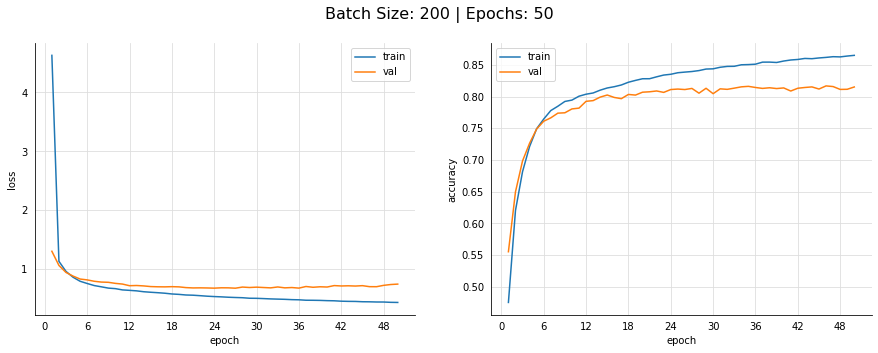

In [133]:
batch_exp(batch_size=200, epochs=50)

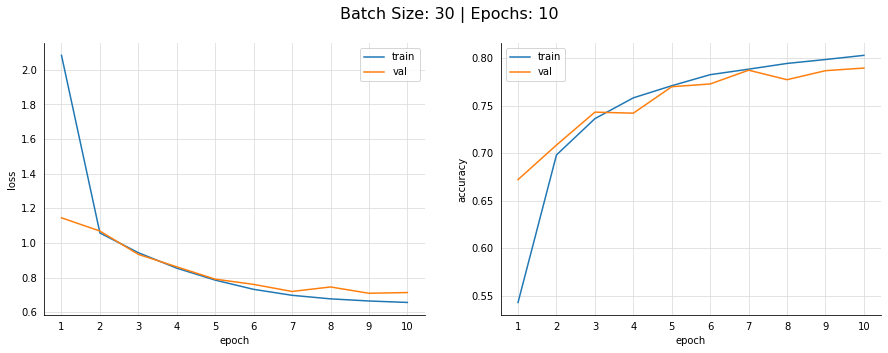

In [134]:
batch_exp(batch_size=30, epochs=10)

Batch size of 80 is the clear winner! Reaching almost .84 validation accuracy. This beats my model yesterday which hovered around .8. I'll use batch size 80 in the next test.

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [153]:
def learn_exp(learning_rate=.001, epochs=30):
    model = create_model(learning_rate=learning_rate)
    results = model.fit(
        X_train, y_train,
        epochs=epochs,
        validation_data=(X_val, y_val),
        batch_size=80,
        verbose=False
    )
    vis(results, test_params=f'Learning Rate: {learning_rate}')

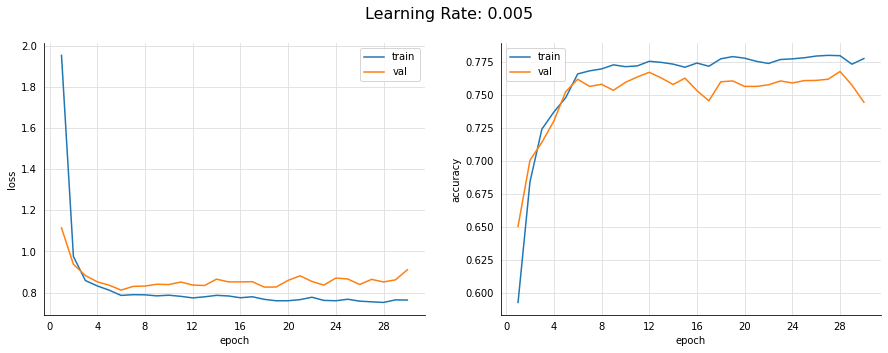

In [154]:
learn_exp(.005)

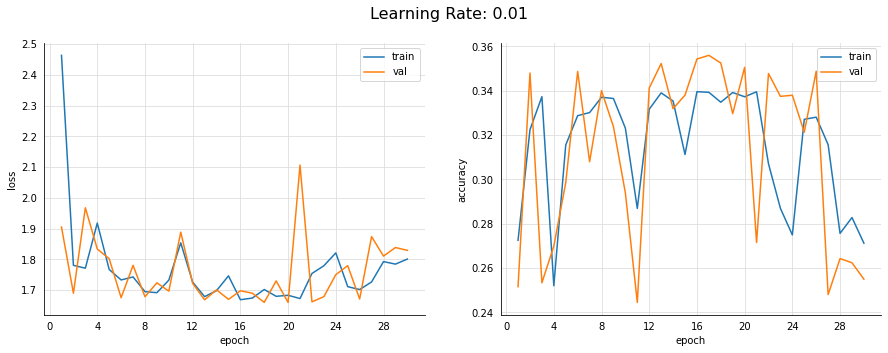

In [155]:
learn_exp(.01)

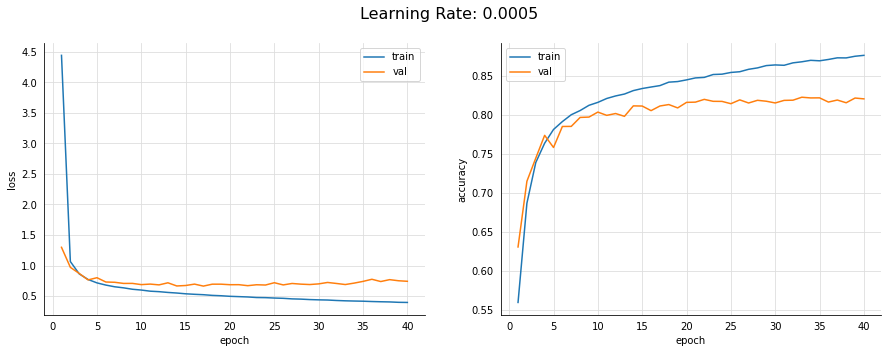

In [156]:
learn_exp(.0005, epochs=40)

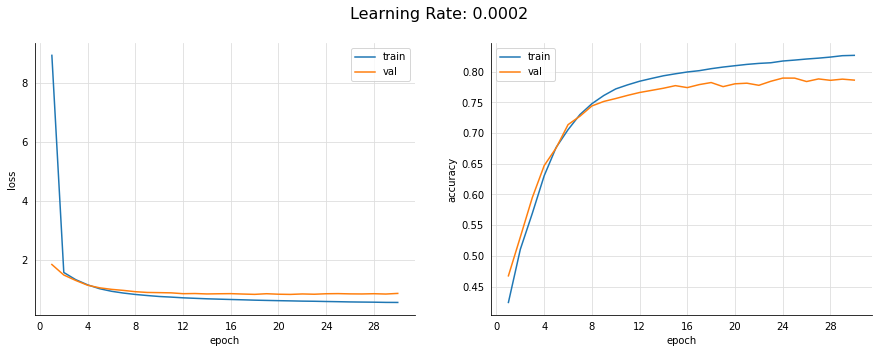

In [157]:
learn_exp(.0002)

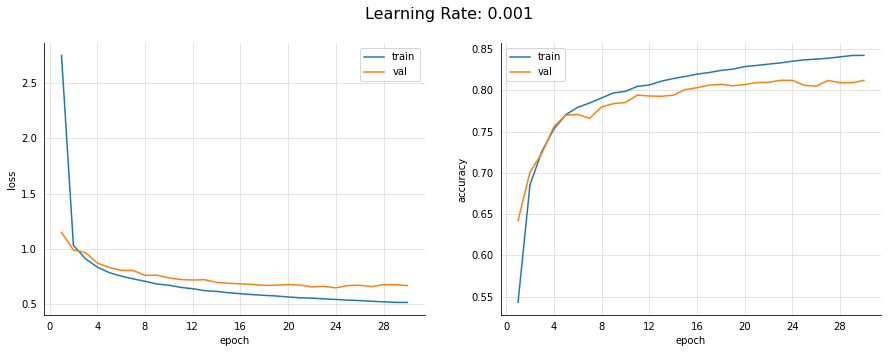

In [158]:
learn_exp(.001)

High learning rates obviously do terrible things. But very low learning rates aren't reaching the same accuracy either. It appears that .001 (the default) and .0005 come to pretty similar accuracies. I'll use .0005 below.

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [145]:
def opt_exp(optimizer='adam', epochs=30):
    model = create_model(learning_rate=.0005, optimizer=optimizer)
    results = model.fit(
        X_train, y_train,
        epochs=epochs,
        validation_data=(X_val, y_val),
        batch_size=80,
        verbose=False
    )
    vis(results, test_params=f'Optimizer: {optimizer}')

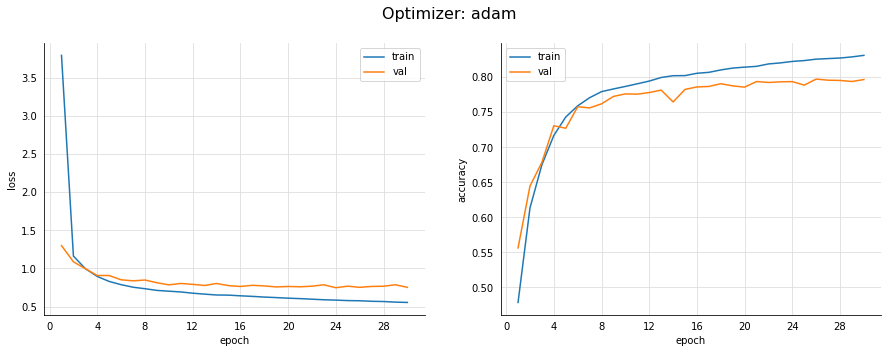

In [159]:
opt_exp('adam')

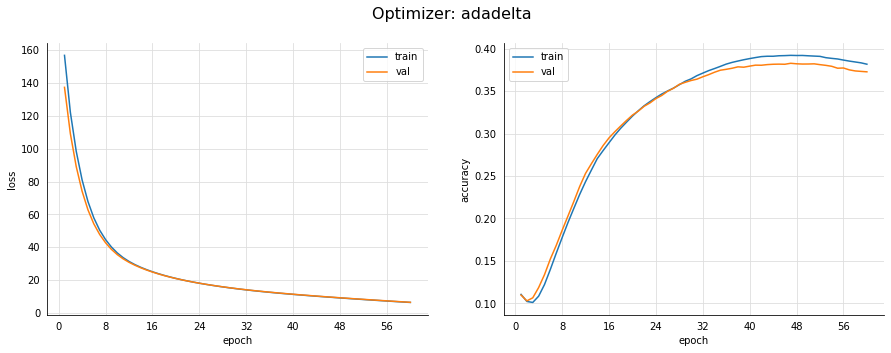

In [160]:
opt_exp('adadelta', epochs=60)

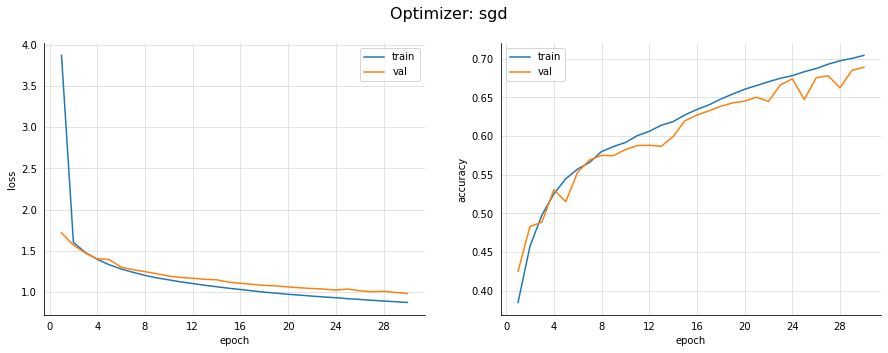

In [161]:
opt_exp('sgd')

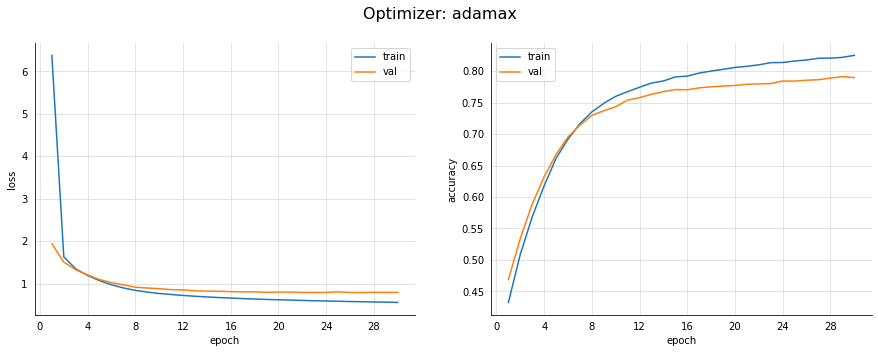

In [162]:
opt_exp('adamax')

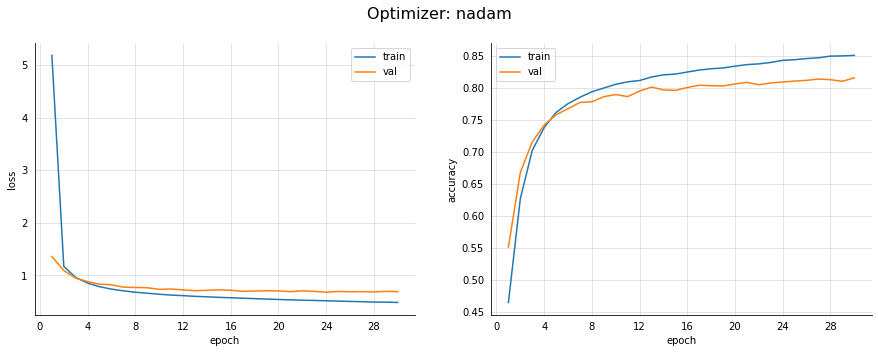

In [163]:
opt_exp('nadam')

**Nadam** wins! But it's slightly below my original accuracy of .84. This is most likely due to the randomness innate in neural net training. 

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 

*Backpropogation is the process by which weights are adjusted by the loss function. Errors (loss) are recorded at the output and used to compute the gradient. The loss function then calculates adjustments for each weight, and little by little follows the gradient to its minimum.*


## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


